# Implementation Linear and Polynomial Regressions with sklearn

### Author: Sunwoo Choi


### Data Reference
Repository URL: https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking

Raw data URL: https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv

Thanks to @fivethirtyeight for providing data :)

In [ ]:
# extract data
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv')
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [ ]:
# makes both percentage values in the same scale
# the range of two columns ('winpercent' and 'sugarpecent') is [0,1] which is the closed matrix

sugar = df['sugarpercent'].to_numpy()
win = df['winpercent'].to_numpy()

X = np.reshape(sugar, (-1,1))
y = np.reshape(win, (-1,1))

Closed matrix form: $w = (X^{T}X)^{-1}X^{T}Y$

In [ ]:
# Linear; use closed form matrix to get the regression line

inv_XT_X= np.linalg.inv(np.matmul(X.T,X))
w = np.matmul(np.matmul(inv_XT_X,X.T), y)

slope = w[0][0]
slope

81.22086178961743

[]

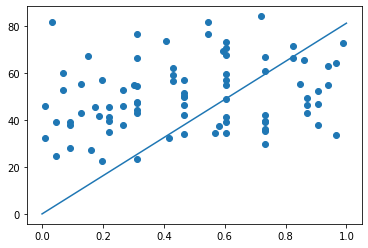

In [ ]:
# ploting 

import matplotlib.pyplot as plt

x = np.linspace(0,1, 1000)
plt.scatter(sugar, win)
plt.plot(x, slope*x)
plt.plot()

[]

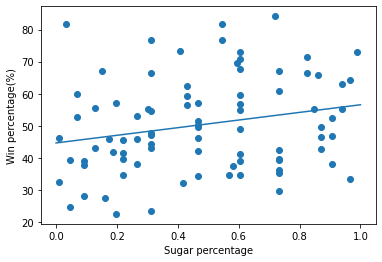

In [ ]:
from sklearn import linear_model


# Linear regression object from sklean
regr = linear_model.LinearRegression()

# traing regression model with X,y data set
regr.fit(X, y)

x = np.linspace(0,1, 1000) # The range of X is from 0 to 1
plt.scatter(sugar, win) # scatter point for all data
plt.xlabel('Sugar percentage')
plt.ylabel('Win percentage(%)')
plt.plot(x, regr.coef_[0][0]*x+regr.intercept_)
plt.plot()

In [ ]:
# Use two feature to train polynomial regression model with degree 3
# All modeling information referenced from https://scikit-learn.org/stable/modules/linear_model.html

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

degree=3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)



Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

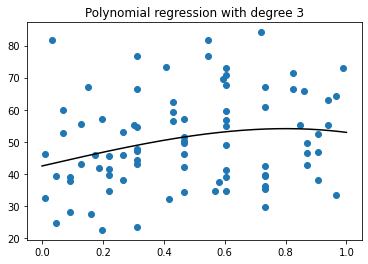

In [ ]:
xLine = np.linspace(0,1,300).reshape(-1,1)

plt.figure()
plt.scatter(X,y)
plt.plot(xLine,polyreg.predict(xLine),color="black")
plt.title("Polynomial regression with degree %d" % (degree))
plt.show()

In [ ]:
# Multiple; add price percent feature in the model

# pre processing
sugar = df[['sugarpercent','pricepercent']].to_numpy()
win = df['winpercent'].to_numpy()

X2 = np.reshape(sugar, (-1,2))
y = np.reshape(win, (-1,1))



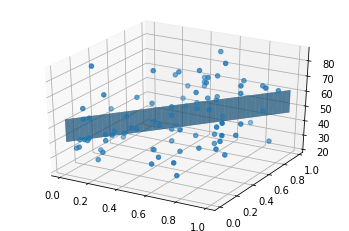

In [ ]:
# Training the model and plotting

regr1 = linear_model.LinearRegression()
regr1.fit(X2, y)

x1D = np.linspace(X2[:,0].min(),X2[:,0].max(), 300)
x2D = np.linspace(X2[:,1].min(),X2[:,1].max(), 300)

# plotting 3d plane referenced from https://stackoverflow.com/questions/36060933/matplotlib-plot-a-plane-and-points-in-3d-simultaneously/36061313
xx,yy = np.meshgrid(x1D,x2D)
z = regr1.coef_[0][0]*xx+regr1.coef_[0][1]*yy +regr1.intercept_[0]
ax = plt.axes(projection='3d')

ax.plot_surface(x1D, x2D, z)
ax.scatter3D(X2[:,0], X2[:,1], y);


In [ ]:
from sklearn.linear_model import Ridge

np.random.seed(1337)

# competitor name is the unique name which is not useful for training the model
ridgeX = df.drop(['competitorname'], axis=1, inplace=False ).to_numpy()

np.random.shuffle(ridgeX)

# Spliting data
splitIdx = (int)(len(ridgeX)*0.7)

trainSet = ridgeX[:splitIdx]
validSet = ridgeX[splitIdx:]


# Ridge regression with parameter 0.1
clf1 = Ridge(alpha=0.1)
clf1.fit(trainSet[:,:-1], trainSet[:,-1])

print(clf1.score(validSet[:,:-1], validSet[:,-1]))

# Ridge regression with parameter 1
clf2 = Ridge(alpha=1)
clf2.fit(trainSet[:,:-1], trainSet[:,-1])

print(clf2.score(validSet[:,:-1], validSet[:,-1]))

# Ridge regression with parameter 2
clf3 = Ridge(alpha=2)
clf3.fit(trainSet[:,:-1], trainSet[:,-1])

print(clf3.score(validSet[:,:-1], validSet[:,-1]))

-0.005913331152240131
0.1717453454455785
0.2341003588537608


The ridge regression with parameter 3 is closest to 1 which is the best possible score of coefficient determination $R^{2}$

The ridge regression with parameter 3 has the best performance in three method.
